# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb (updated to keras_example), neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [2]:
import numpy as np

import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Opening the MC and data frames

In [3]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

# You can display the dataframe by uncommenting these lines and running the cell

In [4]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [5]:
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.613618,0.624997,0.000002,1.371928,438.602722,0.607686
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.101568,0.093,0.000002,1.371928,438.602722,0.607686
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0.670372,0.740995,0.158957,1.798278,440.984772,0.727932
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0.246837,0.234,0.192390,0.777679,438.613037,0.489567
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,0.11096,0.131,0.192390,0.777679,438.613037,0.489567
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0.755327,0.761996,0.986006,1.214413,431.785278,0.826329
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0.242116,0.188,0.158957,1.857195,463.048309,1.271057
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,0.267746,0.346999,0.158957,1.857195,463.048309,1.271057
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,0.161958,0.099,0.158957,1.857195,463.048309,1.271057
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0.280941,0.384999,0.194167,0.890958,445.648376,0.478177


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [6]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14495


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,60.573919,76.036827,0.485147,4,0.052911,778.652954,-18.656456,166.658127,0.982712,0.931875,755.297058,52.63446,157.591797,157.724106,52.388802,754.900085,0.428620,0.286598,0.256,0.158957,1.213902,449.259491,0.725729
1,138.003900,175.262543,0.128094,7,0.027494,91.315063,-90.772301,37.302769,1.0,0.935042,38.524315,59.858082,108.189148,108.177666,59.751347,38.451553,0.569653,0.504149,0.541997,0.257732,1.000000,0.000000,0.000000
2,61.417887,119.537949,0.596151,21,0.663751,922.833374,95.11348,92.014969,0.999953,0.96148,813.386902,62.935711,93.351776,93.313087,62.342369,813.322327,0.457412,0.382898,0.330999,0.187001,1.152277,463.719086,1.055529
3,191.346645,78.047394,0.158344,4,0.033875,429.276611,16.642035,197.61882,0.933451,0.889119,424.599243,87.628914,227.271912,227.301529,87.688164,424.452942,0.309495,0.291139,0.243,0.158957,0.584962,463.407928,NaN
4,135.068442,72.407082,0.53681,21,0.265629,837.007874,-3.073791,35.965153,0.982466,0.93262,893.665283,-37.010475,6.533598,6.414668,-36.817505,894.152100,0.381251,0.278364,0.355999,0.186846,1.029711,426.526123,0.274666
5,204.299223,98.726952,26.200878,5,0.004545,815.487305,40.203739,254.451797,0.99163,0.872027,859.159668,34.738094,166.980621,190.865112,37.883030,848.910583,1.826335,0.337245,0.301,0.158957,1.190624,421.881256,0.564348
6,99.322414,22.768959,0.498285,31,0.260614,870.366028,102.648338,148.948105,0.931105,0.687391,892.148254,102.022118,142.628174,142.446503,101.944046,892.606812,0.414832,0.154691,0.162,0.158957,1.129827,434.640778,NaN
7,90.083520,90.118744,0.610802,21,0.997251,366.326111,-87.615692,52.134495,0.99882,-0.165753,277.757202,-101.59832,56.623451,56.643642,-101.834335,277.190948,1.065376,0.318171,0.347999,0.158957,1.291699,432.170258,0.531300
8,143.404878,32.409004,0.185798,21,0.927820,261.712585,-84.583992,197.50679,0.85715,-0.559339,234.097885,-72.72805,186.635101,186.580627,-72.839043,233.951447,0.516471,0.181775,0.135,0.191098,0.669966,455.320770,0.234743
9,88.279569,140.228088,1.014534,21,0.030519,158.259995,-26.219086,179.89769,0.998434,0.933665,142.093887,69.078735,78.780571,78.624893,69.987122,141.656387,0.576619,0.427958,0.464998,0.194429,1.344572,435.976318,0.437563


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

 What is the meaning of outer fiducial volume? Why are these events categories
separately from other events.

Answer: Since neutrinos can also interact with the detector materials surrounding the argon volume, resulting in incomplete tracking information, we define an inner region—known as the fiducial volume—within the detector. This ensures that only neutrino interactions with final-state particles that are contained in the detector are considered. In the case of MicroBooNE, this volume is defined as 5 cm from the sides of the detector, and only interactions within this volume are considered.

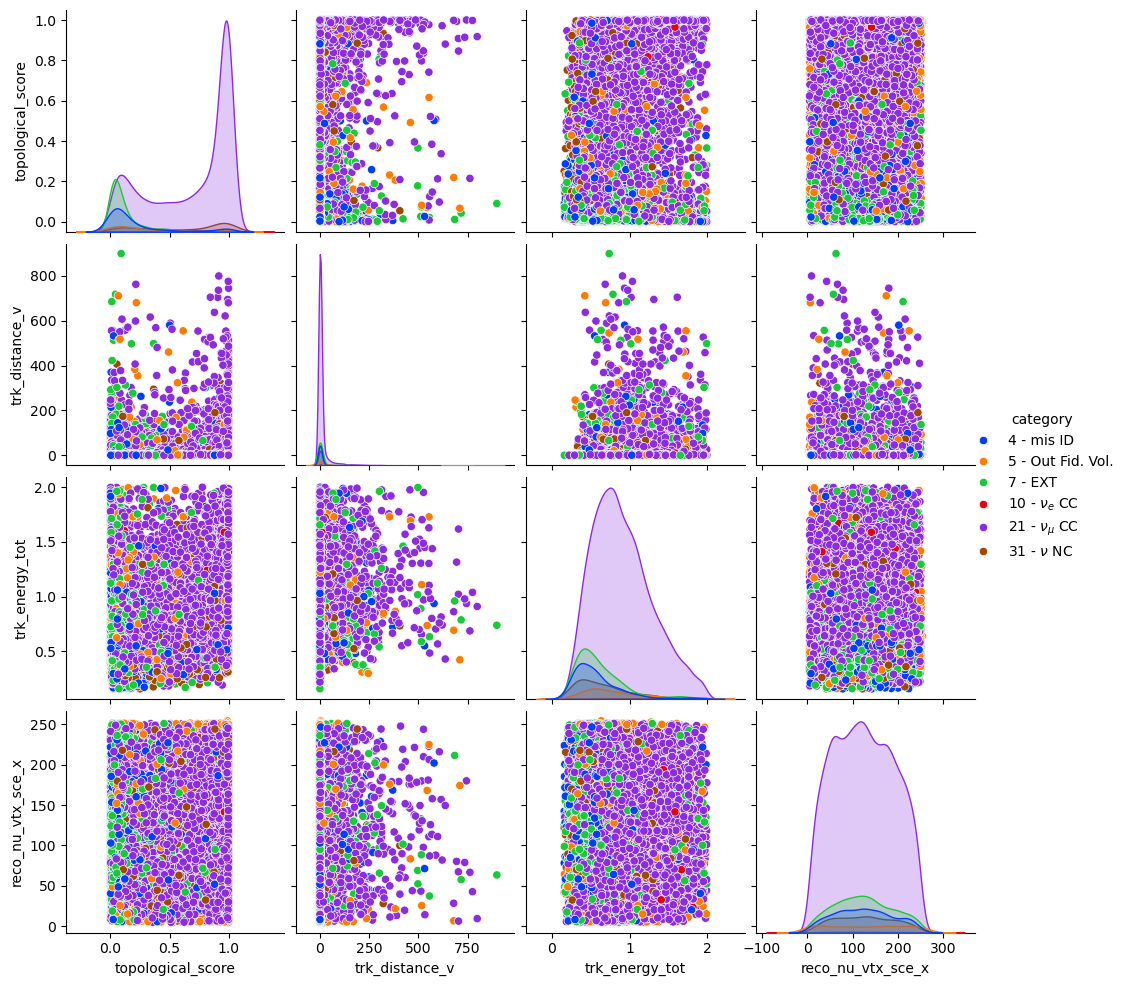

In [7]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

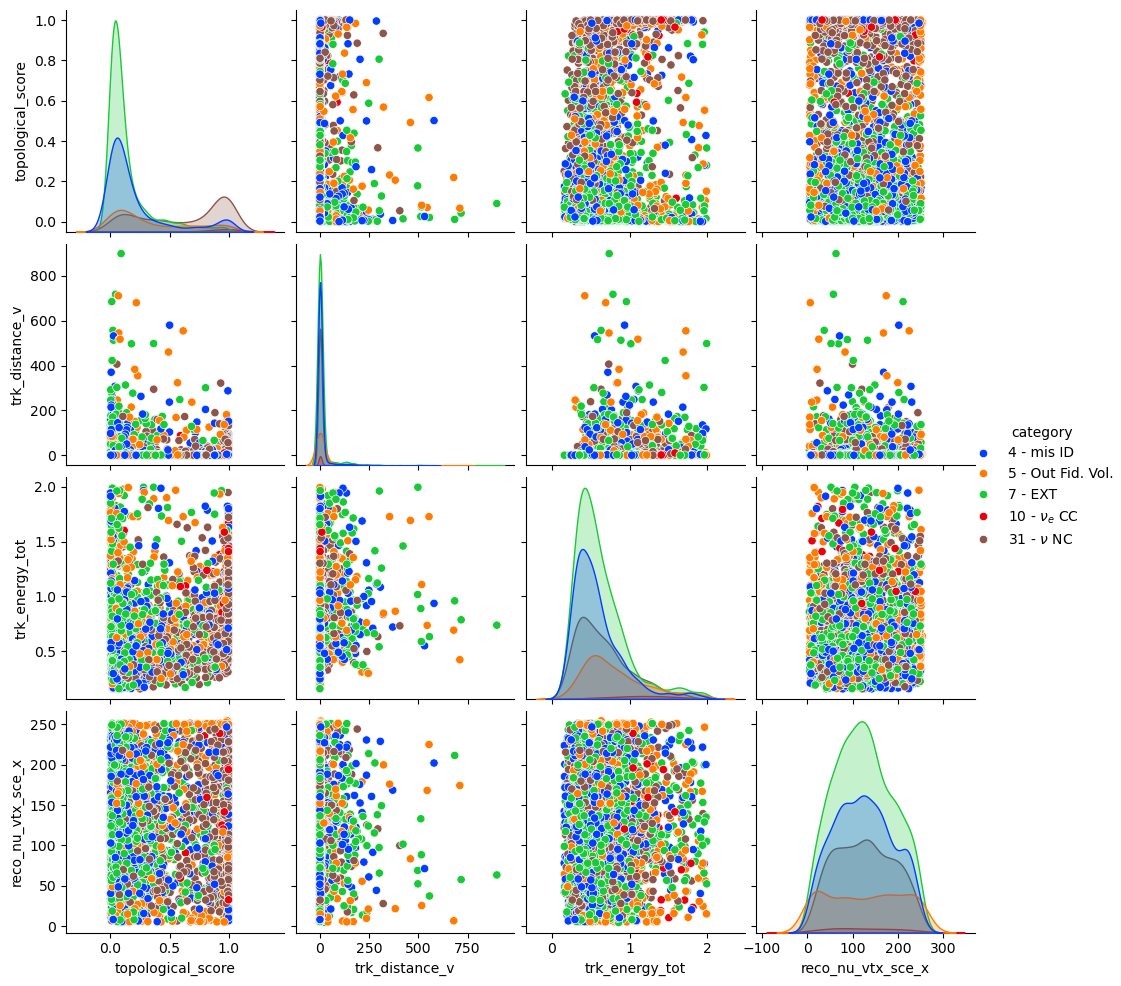

In [8]:
# Create a deep copy of MC_EXT_VIS without signal events
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

MC_EXT_BG = MC_EXT_VIS.copy(deep=True)
MC_EXT_BG = MC_EXT_BG[MC_EXT_BG['category'] != 21]

variable_list = ['category', 'topological_score', 'trk_distance_v',
                 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# ❶ 图例文本：与当前5类一一对应，最后一个改为 ν NC
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# ❷ 只把 category==31 设为棕色，其它颜色保持 'bright'
#    先按出现顺序/排序得到类别列表
hue_order = sorted(MC_EXT_BG['category'].unique())
base_colors = sns.color_palette('bright', n_colors=len(hue_order))
# 构造映射：默认 bright 颜色，然后把 31 改成棕色
palette_map = {c: col for c, col in zip(hue_order, base_colors)}
palette_map[31] = '#8c564b'  # 棕色（与常见图例一致）

# 绘图
fig = sns.pairplot(MC_EXT_BG[variable_list], hue='category',
                   hue_order=hue_order, palette=palette_map, diag_kind='kde')

fig._legend.set_bbox_to_anchor((1.05, 0.5))

# 图例文字（长度与图例项一致）
for t, l in zip(fig._legend.texts, ptype):
    t.set_text(str(t.get_text()) + " - " + str(l))

plt.show()



In [9]:
# Plot your background events using sns.pairplot

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]


In [10]:
# Make sure to delete dataframe copies if you no longer need them!
##del MC_EXT_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [11]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))


# Remove muon neutrino and electron neutrino events.
MC_EXT_ML = MC_EXT_ML[~MC_EXT_ML['category'].isin([10, 21])]
# We did this to remove the dominant signal events and focus on background classification.

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  32004


In [12]:
# Setting up input parameters for Random Forest
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])  # 也可以写成 y = MC_EXT_ML['category'].to_numpy()

# Display shape of X and y
print("(X) shape:", X.shape)
print("(y) shape:", y.shape)

# Split the data into training and testing sets (80/20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Print shapes of the training and test sets
print("\n(x_train) shape:", x_train.shape)
print("(y_train) shape:", y_train.shape)
print("(x_test) shape:", x_test.shape)
print("(y_test) shape:", y_test.shape)


(X) shape: (32004, 16)
(y) shape: (32004,)

(x_train) shape: (25603, 16)
(y_train) shape: (25603,)
(x_test) shape: (6401, 16)
(y_test) shape: (6401,)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [13]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
##rf = RandomForestClassifier(random_state=1)

# Fitting takes the input and "truth" data for classification purposes
## rf.fit(x_train, y_train)
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
# Using parameters to try and prevent overfitting suggested by the lab script.
rf = RandomForestClassifier(
    random_state=1,     # Keep random state for reproducibility.
    n_estimators=1000,  # Number of trees.
    max_depth=8,        # Maximum depth of each tree.
    criterion="gini"    # Use gini impurity as splitting criterion.
)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Test the accuracies of your results:

In [14]:
# Produce predictions for the classification of your training dataset using your model:
##y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
##print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
##rf_acc_train = metrics.accuracy_score(y_train, y_pred)
##y_pred = rf.predict(x_test)
##print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
##rf_acc_test = metrics.accuracy_score(y_test, y_pred)

# Produce predictions for the classification of your training dataset using your model:
y_train_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_train_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_train_pred)
# Now do the same for the testing dataset.
y_pred = y_test_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_test_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_test_pred)

Accuracy on training dataset: 0.6686325821192829
Accuracy on testing dataset: 0.647711295110139


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

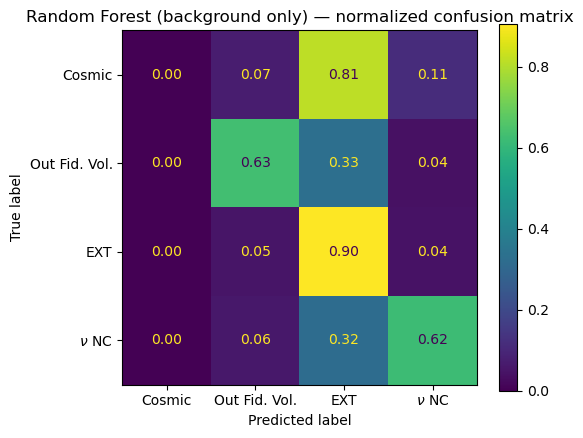

In [15]:
# For labelling your confusion matrix
##ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
##cm = confusion_matrix( ,normalize = 'true')
##disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
##disp.plot()
##plt.show()
labels = [4, 5, 7, 31]
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

cm = confusion_matrix(y_test, y_test_pred, labels=labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)

fig, ax = plt.subplots(figsize=(5.8,4.6))
disp.plot(ax=ax, cmap='viridis', values_format='.02f', colorbar=True)
ax.set_title("Random Forest (background only) — normalized confusion matrix")
plt.tight_layout()
plt.show()

In [16]:
# Print counts of each category.
print("Counts of each category:")
print(MC_EXT_ML['category'].value_counts())

Counts of each category:
category
7     13536
5      9589
4      5091
31     3788
Name: count, dtype: int64


Plot the importance of your different parameters.

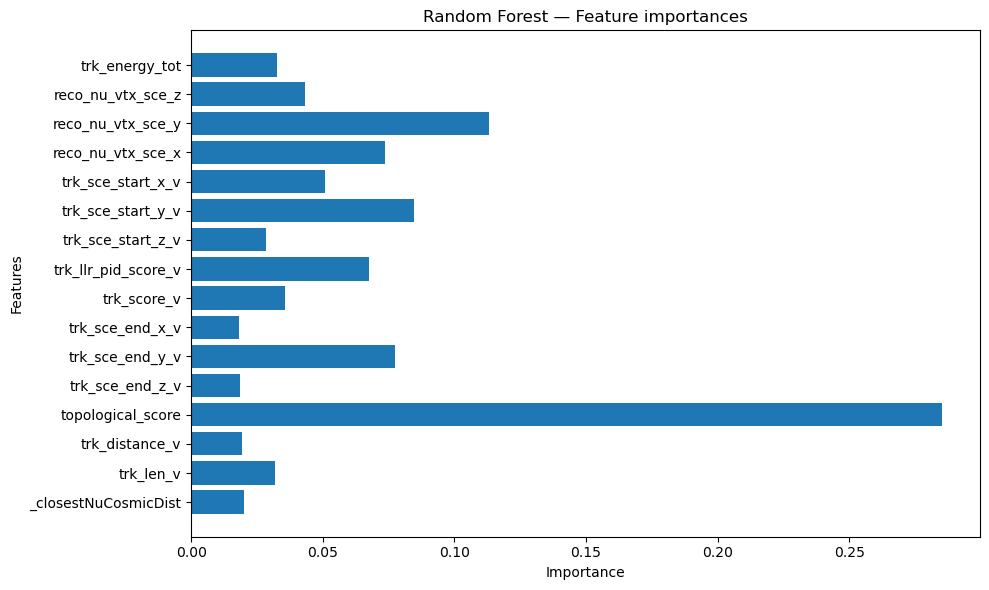

In [17]:
# Plot importance
##importance = rf.feature_importances_
##ytix = features

##plt.barh(range(16), importance)
##plt.yticks(range(16), features)
##plt.xlabel("Importance")
##plt.ylabel("Features")
##plt.show()
importance = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importance)
plt.yticks(range(len(features)), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest — Feature importances")
plt.tight_layout()
plt.show()

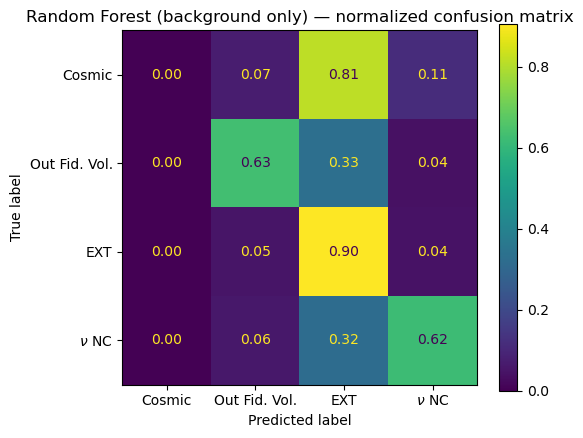

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 定义标签顺序
labels = [4, 5, 7, 31]
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# 生成混淆矩阵（标准化到每行和为1）
cm = confusion_matrix(y_test, y_test_pred, labels=labels, normalize='true')

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
fig, ax = plt.subplots(figsize=(5.8, 4.6))
disp.plot(ax=ax, cmap='viridis', values_format='.02f', colorbar=True)
ax.set_title("Random Forest (background only) — normalized confusion matrix")
plt.tight_layout()
plt.show()

# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [19]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(
    MC_frame,
    variable,
    bins,
    name,
    scaling,
    xlims=[],
    plot_fig=True,
    plot_data=False,
    logscale=None,
    dataFrame=None,
    Stat_func=None
)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [20]:
def Selections(frame):
    
    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    
    # Apply selection on dataframe
    frame = frame[selection]
    
    return frame

## Calls the selection function on the dataframes

In [21]:
MC_EXT = Selections(MC_EXT)
data_frame = Selections(data)

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [22]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))
print(all_variables_to_plot)


['trk_llr_pid_score_v', 'reco_nu_vtx_sce_y', 'trk_sce_start_x_v', 'trk_score_v', 'trk_distance_v', 'topological_score', 'trk_energy_tot', 'trk_len_v', 'reco_nu_vtx_sce_x', '_closestNuCosmicDist', 'reco_nu_vtx_sce_z', 'category', 'trk_sce_end_x_v', 'trk_sce_start_z_v', 'trk_sce_end_z_v', 'trk_range_muon_mom_v', 'trk_sce_start_y_v', 'trk_mcs_muon_mom_v', 'trk_sce_end_y_v']


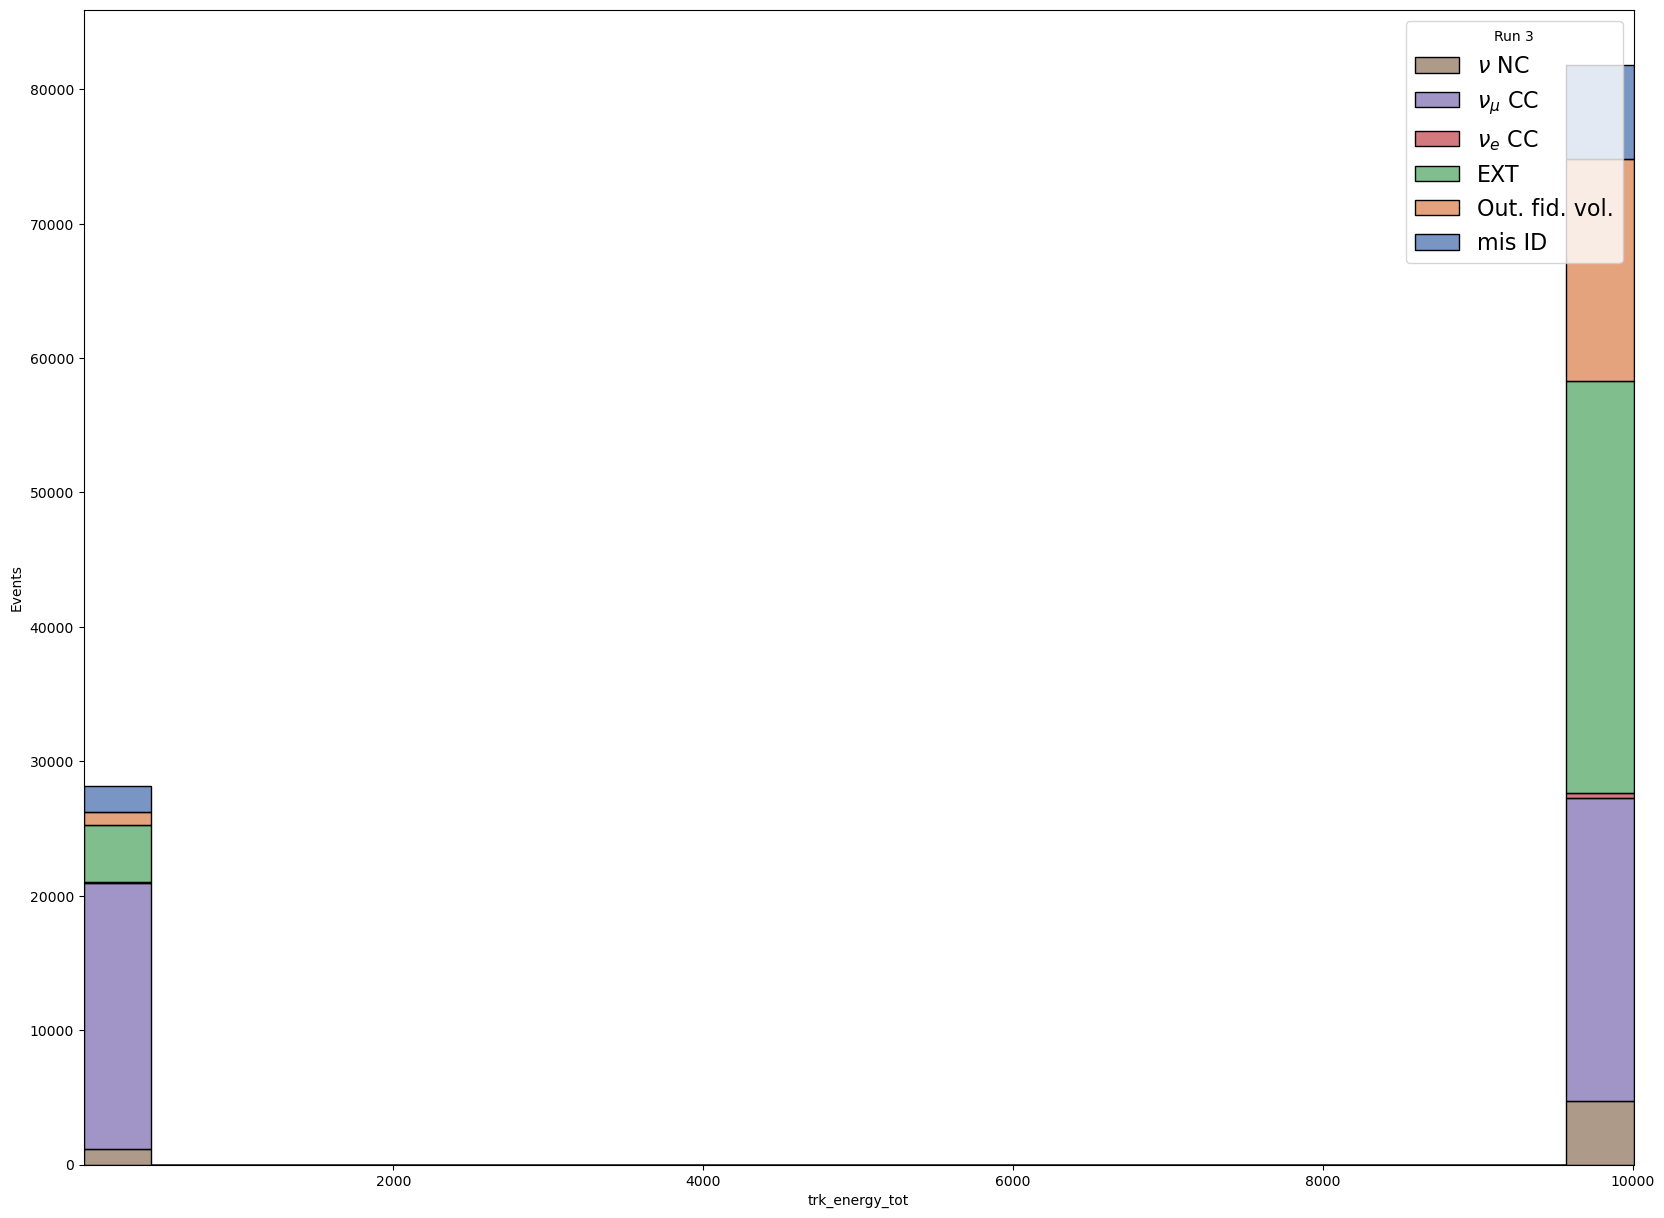

In [23]:
# Simple histogram plot of one variable.
BIN = 23
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_energy_tot', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)

In [40]:
def plot_all_histograms(df, variables, title_cut, BIN=23, figsize=(20, 30)):
    """Plot stacked, weighted histograms for the variables in a 2-col grid."""
    n_vars = len(variables)
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    plt.figure(figsize=figsize)
    for idx, var in enumerate(variables):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        i = sns.histplot(
            data=df, x=var,
            multiple="stack", hue="category",
            palette='deep', weights=MC_EXT['weight'],
            bins=BIN, legend=False)
        i.set(xlabel=var, ylabel="Events")
        # plt.yscale('log')  # enable if you want to inspect long tails
        plt.xlim([np.min(MC_EXT[var]), np.max(MC_EXT[var])])

    # put legend into an extra empty slot
    legend_ax = plt.subplot(n_rows, n_cols, n_rows * n_cols)
    legend_ax.axis('off')
    labels = [r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC",
              r"EXT", r"Out. fid. vol.", r"mis ID"]
    patches = [plt.Rectangle((0,0),1,1) for _ in labels]
    legend_ax.legend(patches, labels, title='Categories',
                     loc='center', fontsize=14, title_fontsize=16)

    plt.tight_layout()
    plt.show(i)


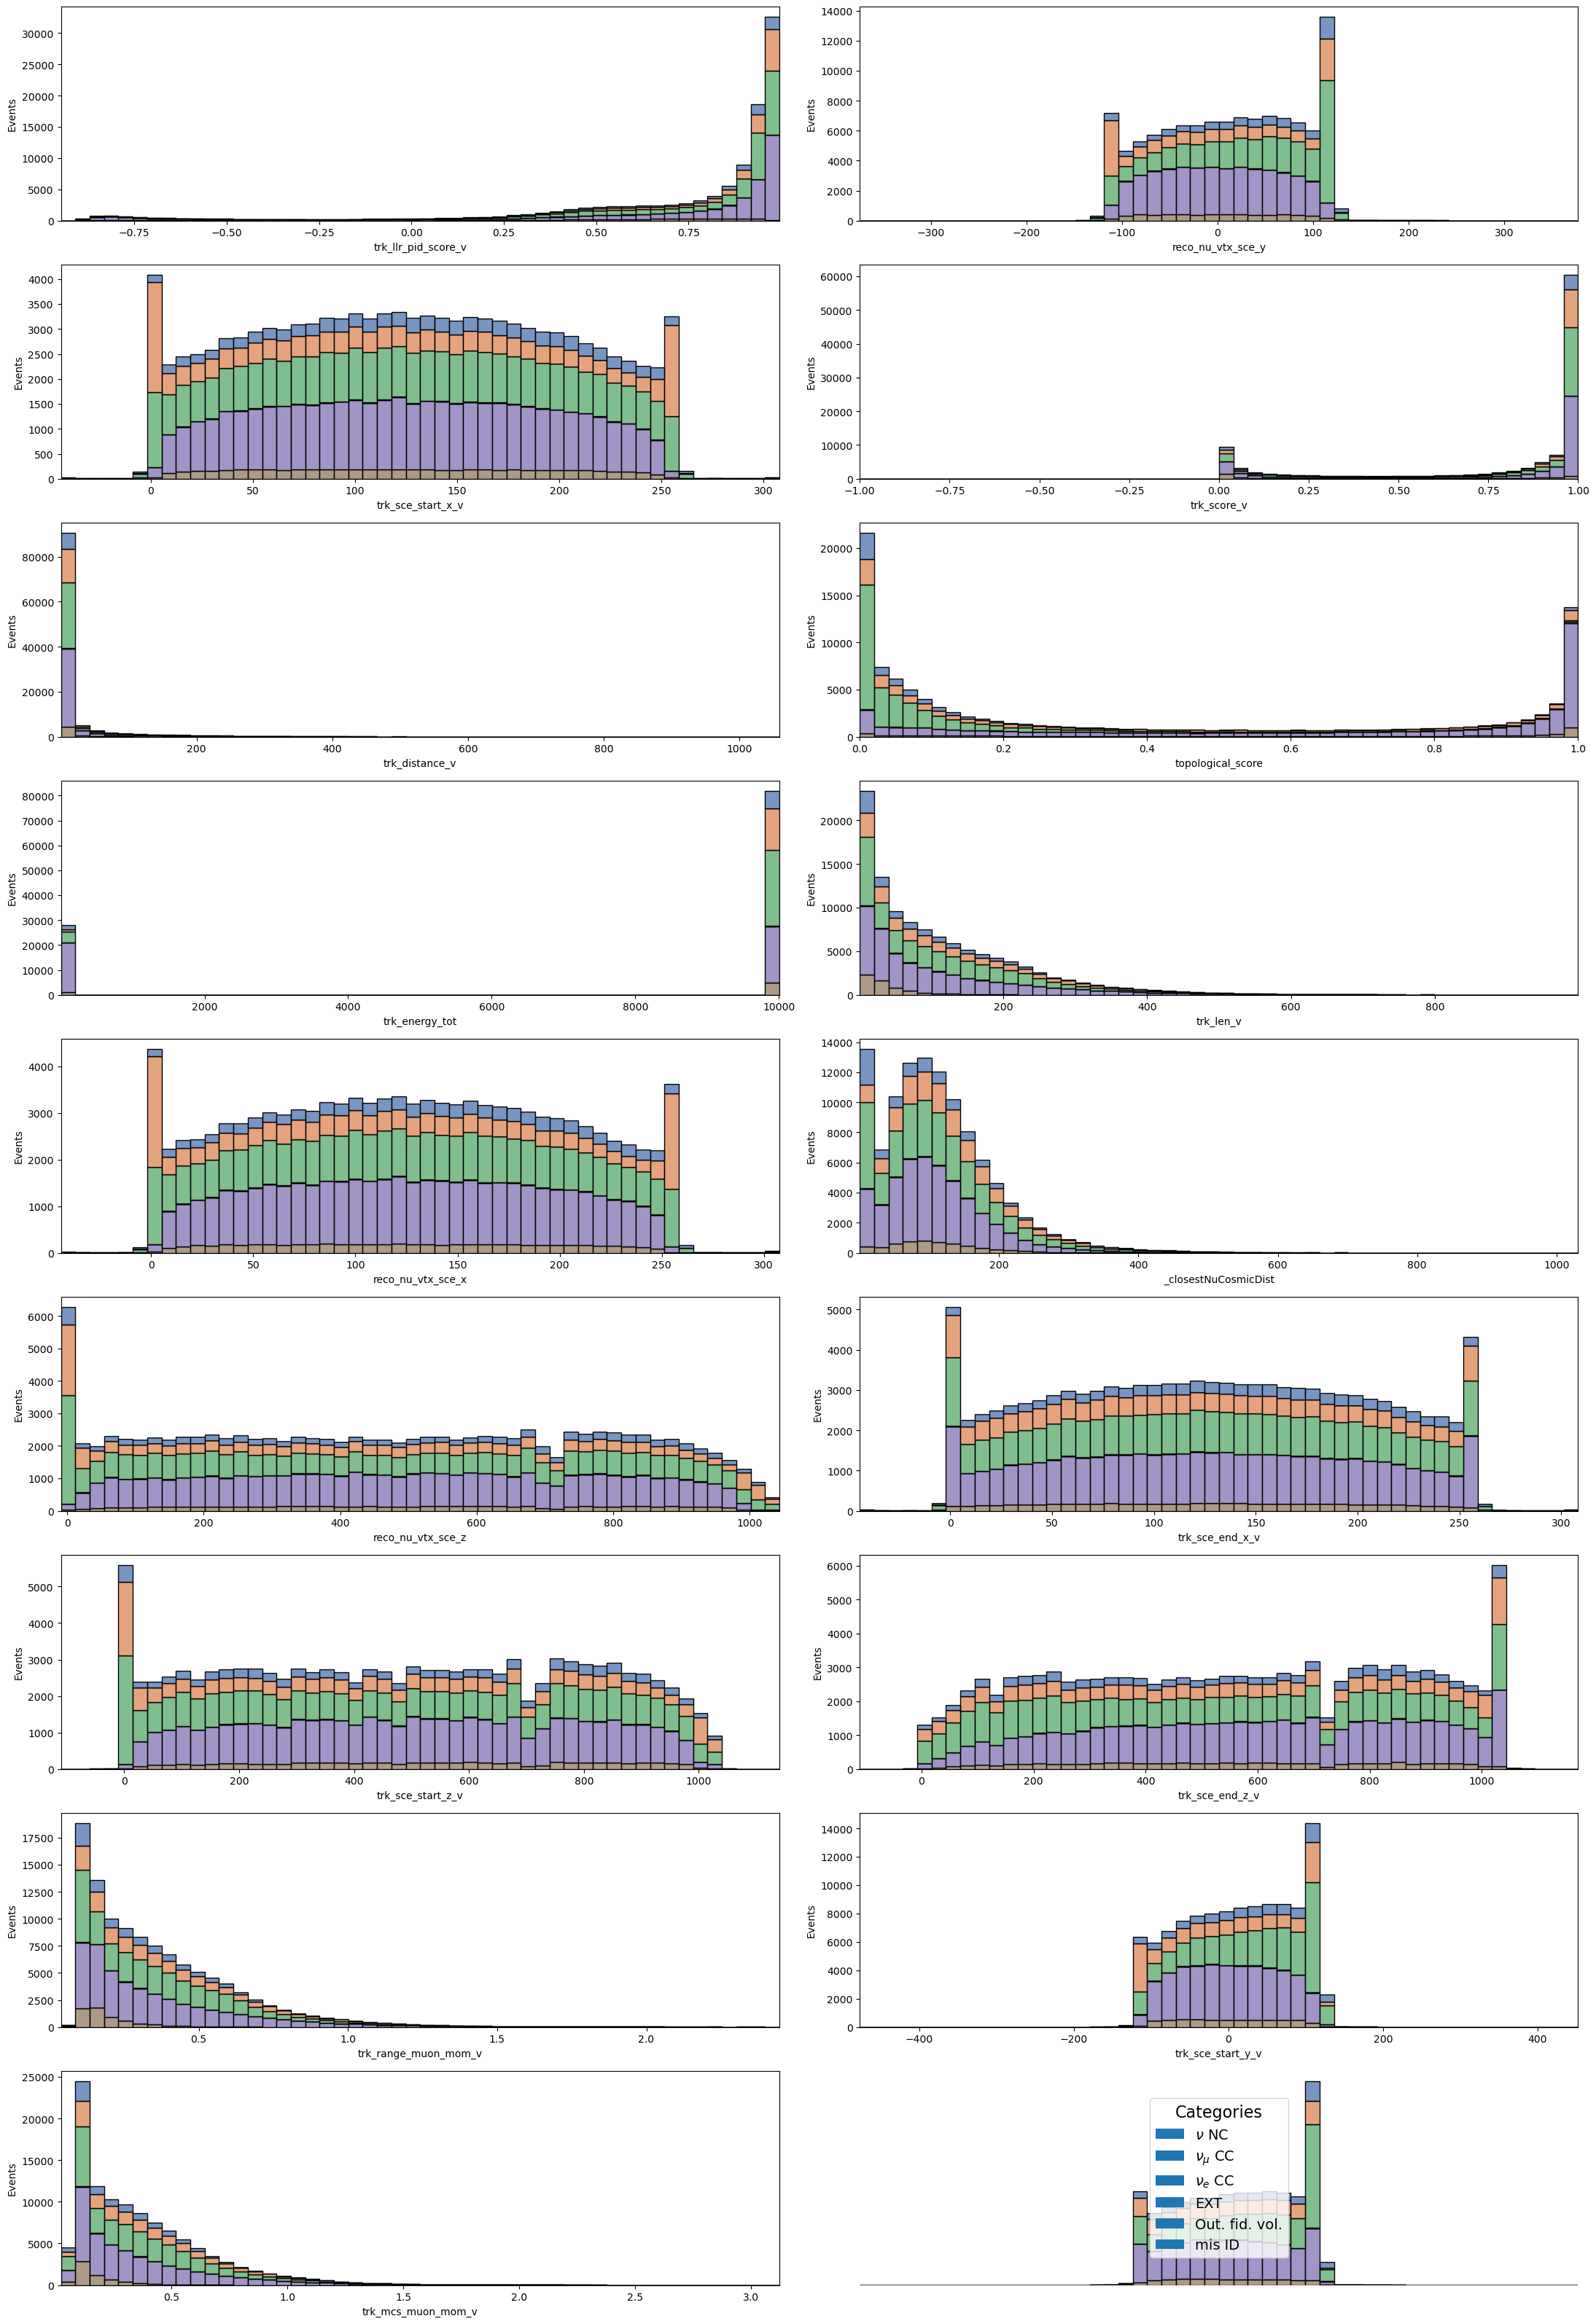


----- Selection summary -----
Before: 555442    After: 124083

Category yields BEFORE:
 category
4      50908
5      95507
7     135397
10      2228
21    234121
31     37281
Name: count, dtype: int64

Category yields AFTER:
 category
4      8527
5      2933
7     12524
10      349
21    93348
31     6402
Name: count, dtype: int64


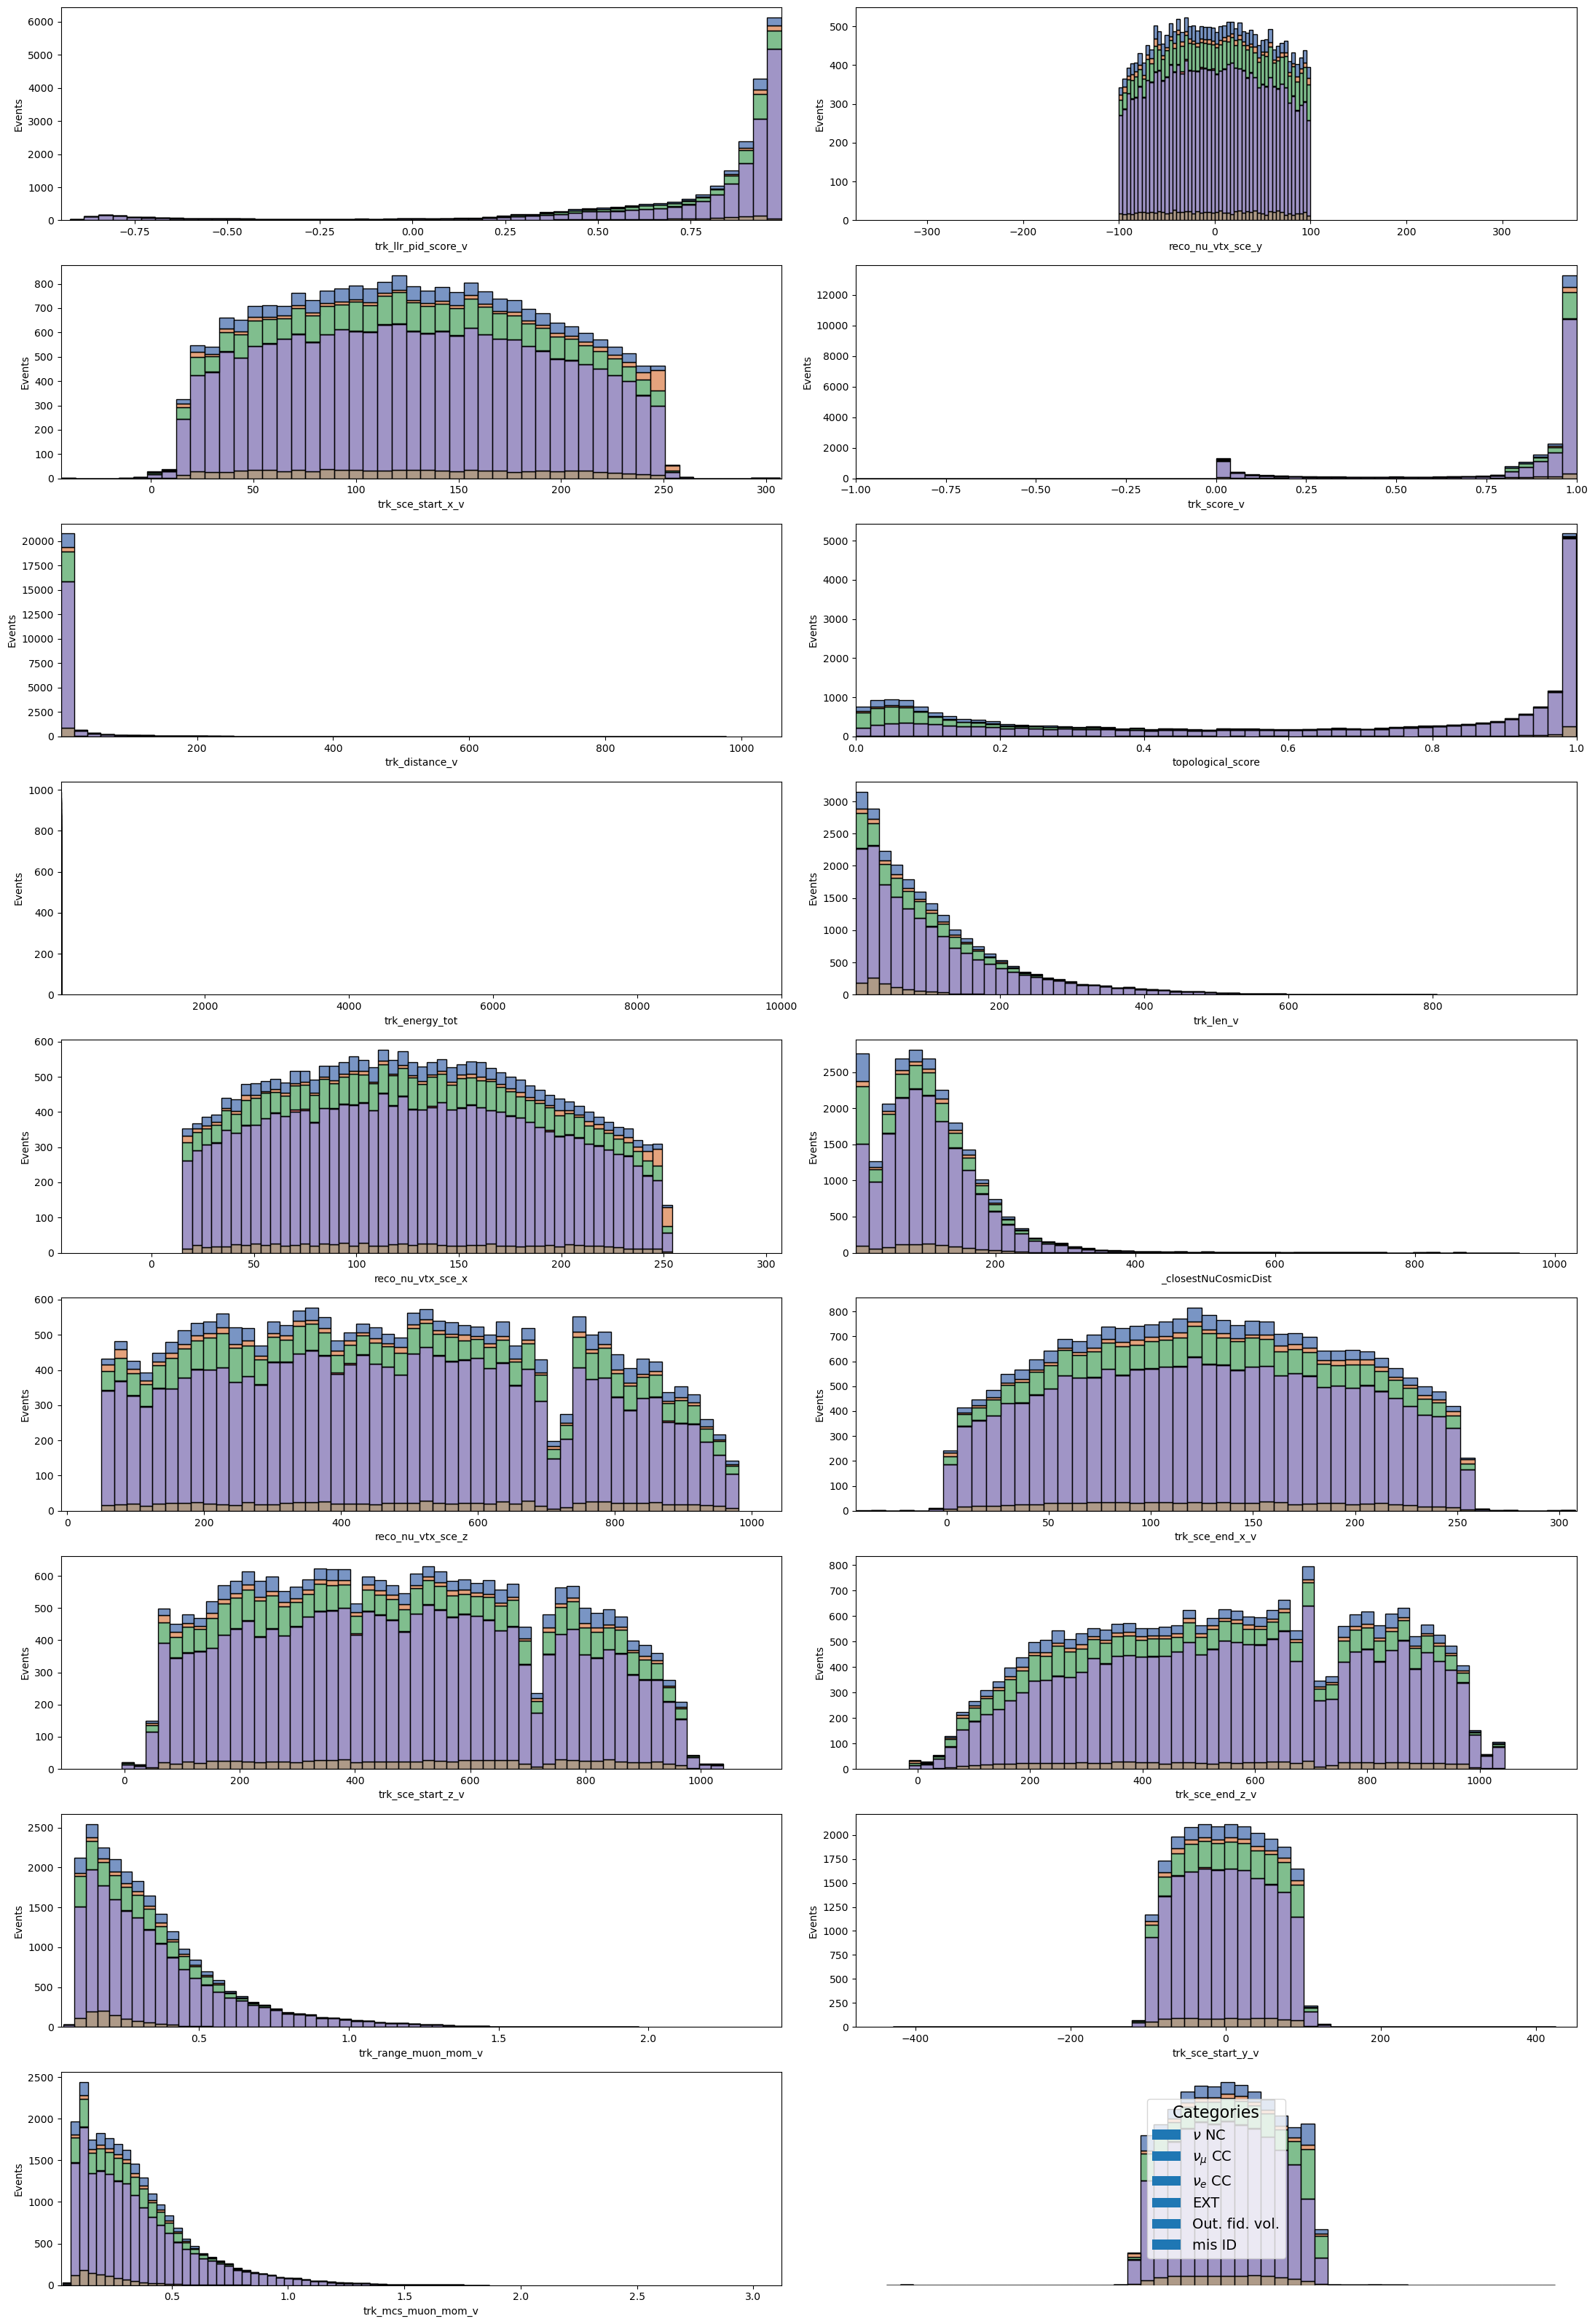

In [41]:
import numpy as np
import pandas as pd

# --- keep your desired variable order (drop 'category' if you won't plot it on x) ---
desired_order = [
    'trk_llr_pid_score_v', 'reco_nu_vtx_sce_y', 'trk_sce_start_x_v', 'trk_score_v',
    'trk_distance_v', 'topological_score', 'trk_energy_tot', 'trk_len_v',
    'reco_nu_vtx_sce_x', '_closestNuCosmicDist', 'reco_nu_vtx_sce_z',
    'trk_sce_end_x_v', 'trk_sce_start_z_v', 'trk_sce_end_z_v',
    'trk_range_muon_mom_v', 'trk_sce_start_y_v', 'trk_mcs_muon_mom_v', 'trk_sce_end_y_v'
]
all_variables_to_plot = [c for c in desired_order if c in MC_EXT.columns and c != 'category']

# --- minimal selection helper (supports <, <=, >, >=, between, outside) ---
def apply_selections(df, cuts):
    """
    cuts: dict like
      {
        'trk_energy_tot': ('<', 2.0),
        'reco_nu_vtx_sce_x': ('between', (15, 285)),
        ...
      }
    """
    mask = np.ones(len(df), dtype=bool)
    for col, (mode, val) in cuts.items():
        if col not in df.columns:
            print(f"[warn] '{col}' not found, skip.")
            continue
        s = pd.to_numeric(df[col], errors='coerce')
        if mode == '<':    mask &= (s <  val)
        elif mode == '<=': mask &= (s <= val)
        elif mode == '>':  mask &= (s >  val)
        elif mode == '>=': mask &= (s >= val)
        elif mode == 'between':
            lo, hi = val;   mask &= (s >= lo) & (s <= hi)
        elif mode == 'outside':
            lo, hi = val;   mask &= (s < lo) | (s >  hi)
        else:
            raise ValueError(f"Unknown mode: {mode}")
    return df[mask].copy(), mask

# ---------------- BEFORE ----------------
plot_all_histograms(
    MC_EXT, all_variables_to_plot,
    title_cut="Weighted histograms — BEFORE cuts",
    BIN=50, figsize=(22, 32)   # increase BIN/figsize for more detail
)

# ---------------- Define your cuts ----------------
cuts = {
    'trk_energy_tot':    ('<', 2.0),           # couple of GeV
    'reco_nu_vtx_sce_x': ('between', (15, 285)),
    'reco_nu_vtx_sce_y': ('between', (-100, 100)),
    'reco_nu_vtx_sce_z': ('between', (50, 980)),
}

# ---------------- Apply cuts ----------------
MC_EXT_cut, sel_mask = apply_selections(MC_EXT, cuts)

# quick summary
print("\n----- Selection summary -----")
print("Before:", len(MC_EXT), "   After:", len(MC_EXT_cut))
print("\nCategory yields BEFORE:\n", MC_EXT['category'].value_counts().sort_index())
print("\nCategory yields AFTER:\n",  MC_EXT_cut['category'].value_counts().sort_index())

# ---------------- AFTER ----------------
plot_all_histograms(
    MC_EXT_cut, all_variables_to_plot,
    title_cut="Weighted histograms — AFTER cuts",
    BIN=50, figsize=(22, 32)
)


# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

In [42]:
import numpy as np
import pandas as pd

def apply_selections(df, cuts):
    mask = np.ones(len(df), dtype=bool)
    for col, (mode, val) in cuts.items():
        s = pd.to_numeric(df[col], errors='coerce')
        if mode == '<':    mask &= (s <  val)
        elif mode == '<=': mask &= (s <= val)
        elif mode == '>':  mask &= (s >  val)
        elif mode == '>=': mask &= (s >= val)
        elif mode == 'between':
            lo, hi = val;  mask &= (s >= lo) & (s <= hi)
        elif mode == 'outside':
            lo, hi = val;  mask &= (s < lo) | (s >  hi)
        else:
            raise ValueError(f"Unknown mode {mode}")
    return df[mask].copy(), mask

def stepwise_metrics(df, signal_col='category', signal_code=21, steps=None):
    """
    steps: list of tuples (name, {col: (mode, value), ...}) 
           每一步可以是一个或多个 cut 的组合
    """
    N0 = len(df)
    S0 = (df[signal_col] == signal_code).sum()

    running = df.copy()
    print(f"BASELINE: total={N0}, signal={S0}, purity={S0/N0:.3f}")

    for i, (label, cut_dict) in enumerate(steps, 1):
        running, _ = apply_selections(running, cut_dict)
        Nt = len(running)
        St = (running[signal_col] == signal_code).sum()
        eff_overall = Nt/N0
        eff_signal  = St/S0 if S0>0 else np.nan
        purity      = St/Nt if Nt>0 else np.nan
        print(f"[{i}] {label:12s}  total={Nt:6d}  signal={St:6d}  "
              f"eff_total={eff_overall:.3f}  eff_sig={eff_signal:.3f}  purity={purity:.3f}")
    return running

# === 按你的顺序定义每一步（示例，数值用你当前的）===
steps = [
    ("E<2GeV",               {'trk_energy_tot': ('<', 2.0)}),
    ("Fid x [15,285]",       {'reco_nu_vtx_sce_x': ('between', (15, 285))}),
    ("Fid y [-100,100]",     {'reco_nu_vtx_sce_y': ('between', (-100, 100))}),
    ("Fid z [50,980]",       {'reco_nu_vtx_sce_z': ('between', (50, 980))}),
]

_ = stepwise_metrics(MC_EXT, signal_col='category', signal_code=21, steps=steps)


BASELINE: total=555442, signal=234121, purity=0.422
[1] E<2GeV        total=144210  signal=105086  eff_total=0.260  eff_sig=0.449  purity=0.729
[2] Fid x [15,285]  total=139838  signal=102176  eff_total=0.252  eff_sig=0.436  purity=0.731
[3] Fid y [-100,100]  total=127771  signal= 96110  eff_total=0.230  eff_sig=0.411  purity=0.752
[4] Fid z [50,980]  total=124083  signal= 93348  eff_total=0.223  eff_sig=0.399  purity=0.752


# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [27]:
# oscillation function


In [28]:
# muon disappearance application to reconstructed neutrino energy


In [29]:
# chi squared function


# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

In [30]:
# Selection cuts on oscillated data

In [31]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)

In [32]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)

In [33]:
# plot contourf function and find minimum!

Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [34]:
# oscillate MC wrt to true data

In [35]:
# contourf application

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [36]:
# contour application, with correct confidence levels.

In [37]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [38]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

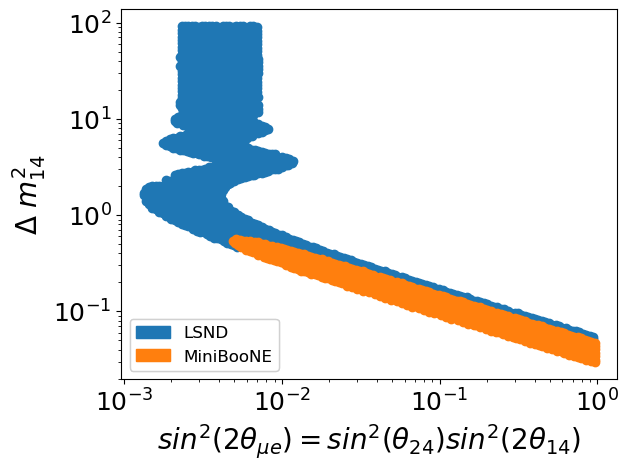

In [39]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)


plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()